<a href="https://colab.research.google.com/github/Sharon-Faith/hypothyroidism-proj/blob/main/hypothyroidism_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### a) Specifying the Question

The main objective of the study is to build a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidism, using information from [this dataset](http://bit.ly/hypothyroid_data).

### b) Defining the Metric for Success

* Determining and visualising the descriptive statistics of the variables in the dataset.
* Determining and visualising some of the relationships between the status (hypothyroid or negative) and the predictor variables.
* Creating a model that will enable one to determine whether or not a patient's symptoms indicate that the patient has hypothyroidism.


### c) Understanding the context 

Hypothyroidism is a condition where the thyroid gland doesn't produce enough thyroid hormone. This can disrupt important metabolic systems in the body, heart rate etc. Some seroius symptoms when the thyroid hormone levels are low include anemia and low body temperature. It is, however, a treatable condition, using regular medications. We will be investigating some factors that may influence if/indicate that a person has hypothyroidism. We will also be using those factors to build a model that can determine a person's status (has hypothyroidism/negative).

### d) Recording the Experimental Design

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them, drop unnecessary columns etc.
*    Analyse the dataset using univariate, bivariate and multivariate analysis techniques.
*   Implement the solution through modelling.
*   Challenge the solution.
*   Conclusion and recommendations

### e) Data Relevance

The dataset provided ([here](http://bit.ly/hypothyroid_data)) is relevant to the research question. It has the measurements of various substances in the body as well as responses to relevant questions on conditions that may influence whether one has hypothyroid or not.

## Reading the Data

In [190]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# from sklearn.model_selection import KFold
# import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# import statsmodels.formula.api as smf
# from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [191]:
# Loading the Dataset
# 
df = pd.read_csv('hypothyroid.csv')

## Checking the Data

In [192]:
# Determining the no. of records in our dataset
#
df.shape

(3163, 26)

In [193]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [194]:
# Previewing the bottom of our dataset
# 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [195]:
# Checking datatype of each column
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## Tidying the Dataset

In [196]:
#NB: all data is in string format even though some columns represent continuous data -#TBG, FTI, T4U, TT4, T3, TSH, age

In [197]:
#checking for anomalies
#seeing unique values and checking for anomalies in columns representing categorical data
for col in df.drop(columns=['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'age']).columns:
  print(col, ' : ', df[col].unique())
  print('***************************************************************')
  print()

#sex column has unknown '?'

status  :  ['hypothyroid' 'negative']
***************************************************************

sex  :  ['M' 'F' '?']
***************************************************************

on_thyroxine  :  ['f' 't']
***************************************************************

query_on_thyroxine  :  ['f' 't']
***************************************************************

on_antithyroid_medication  :  ['f' 't']
***************************************************************

thyroid_surgery  :  ['f' 't']
***************************************************************

query_hypothyroid  :  ['f' 't']
***************************************************************

query_hyperthyroid  :  ['f' 't']
***************************************************************

pregnant  :  ['f' 't']
***************************************************************

sick  :  ['f' 't']
***************************************************************

tumor  :  ['f' 't']
*********************************

In [198]:
#sex had a ? value.
df.sex.value_counts()

F    2182
M     908
?      73
Name: sex, dtype: int64

In [199]:
#dropping records with the value for sex missing because the feature will be used in analysis
df = df[df.sex != '?'].copy()

In [200]:
df.sex.value_counts()

F    2182
M     908
Name: sex, dtype: int64

In [201]:
#all columns are in string format but some are representing continuous data. investigating if there are non numerical
#values in the columns representing continuous data
#TBG, FTI, T4U, TT4, T3, TSH, age
cols2 = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'age']
for col in cols2:
  for val in df[col].unique():
    try:
      float(val)
    except:
      print(col, val)
# all these columns have '?' in addition to the numerical columns
#the '?' represents null

TSH ?
T3 ?
TT4 ?
T4U ?
FTI ?
TBG ?
age ?


In [202]:
df.age.value_counts()
#390 null values ('?') in age

?     390
60     64
59     64
62     63
28     60
     ... 
97      1
5       1
98      1
90      1
93      1
Name: age, Length: 93, dtype: int64

In [203]:
df.shape

(3090, 26)

In [204]:
#dropping null in age
df = df[df.age != '?'].copy()
df.shape

(2700, 26)

In [205]:
#the continuous columns, except age, have columns that answer whether or not that substance was measured in a yes or no format.
#inspecting the columns.  
cols = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
for col in cols:
  print(f"Length of {col} = no : {len(df[df[col] =='n'])})")
  print(f"Length of {col} = yes : {len(df[df[col] =='y'])})")
  print('***************************************')
#it would be expected that if measured was no, on the same row the corresponding substance would not have a measurement value,
#which will be tested shortly

Length of TSH_measured = no : 422)
Length of TSH_measured = yes : 2278)
***************************************
Length of T3_measured = no : 632)
Length of T3_measured = yes : 2068)
***************************************
Length of TT4_measured = no : 217)
Length of TT4_measured = yes : 2483)
***************************************
Length of T4U_measured = no : 216)
Length of T4U_measured = yes : 2484)
***************************************
Length of FTI_measured = no : 215)
Length of FTI_measured = yes : 2485)
***************************************
Length of TBG_measured = no : 2475)
Length of TBG_measured = yes : 225)
***************************************


In [206]:
#testing if assumption that columns with subsance_measured as no, have ? in corresponding substance column
df[df['TSH_measured'] =='n'].iloc[:,14:].head()
#seems to be the case but will be confirmed for sure later

,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
55,n,?,n,?,y,44,y,0.90,y,49,n,?
152,n,?,y,1,y,83,y,0.95,y,87,n,?
166,n,?,n,?,n,?,n,?,n,?,y,0
170,n,?,y,1.70,y,82,y,0.72,y,114,n,?
184,n,?,y,1.50,y,97,y,0.91,y,107,n,?


In [207]:
#as can be seen above, there are people who didnt have
#the levels of certain subastances measured. It seems the corresponding columns where
#the measurements have been recorded have a questionmark. We will
#replace the questionmark with null
cols2 = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in cols2:
  df[col] = df[col].replace({'?': None})
df[df['TSH_measured'] =='n'].iloc[:,14:].head(3)

,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
55,n,None,n,None,y,44,y,0.90,y,49,n,None
152,n,None,y,1,y,83,y,0.95,y,87,n,None
166,n,None,n,None,n,None,n,None,n,None,y,0


In [208]:
#visualising the number of nulls in the measurment columns
for col in df.columns:
  if df[col].isnull().sum() > 0:
    print(col,  df[col].isnull().sum())

TSH 422
T3 632
TT4 217
T4U 216
FTI 215
TBG 2475


In [209]:
df.shape

(2700, 26)

In [210]:
#too many missing TBG measurements so will drop those columns
df.drop(columns=['TBG_measured', 'TBG'], inplace=True)

In [211]:
#dropping records that have nulls in any of the other measurements because the values of the substances
#are important for analysis
df.dropna(subset=['TSH', 'T3', 'TT4', 'T4U', 'FTI'], how='any', inplace=True)

In [212]:
#after dropping the dataset still has a good number of records to work with - 2000
df.shape

(2000, 24)

In [213]:
#As expected, dropping the records that had null measurements for the different substances automatically dropped the records
#that had the substance_measured columns = no, which is visualised below. 
#This means our assumption that columns with subsance_measured as no, have null in corresponding substance column was true
for col in cols[:-1]:
  print(col)
  print(df[col].unique())
  print('***************************************')

TSH_measured
['y']
***************************************
T3_measured
['y']
***************************************
TT4_measured
['y']
***************************************
T4U_measured
['y']
***************************************
FTI_measured
['y']
***************************************


In [214]:
#because all the measured columns now have only one value - yes, we can drop them
df.drop(columns=cols[:-1], inplace=True)

In [215]:
#previewing tidied dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,30,0.60,15,1.48,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,145,1.70,19,1.13,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,0,0.20,4,1,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,430,0.40,6,1.04,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,7.30,1.20,57,1.28,44


In [216]:
#datatype conversion
#the datatype for the continuous columns is still object. Now that we have dealt with the questionmarks, 
#they can be converted to numerical form
cols2 = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']

for col in cols2:
  df[col] = df[col].apply(lambda x: float(x))

In [217]:
#checking if datatype conversion worked
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
dtype: object

In [218]:
cols2

['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']

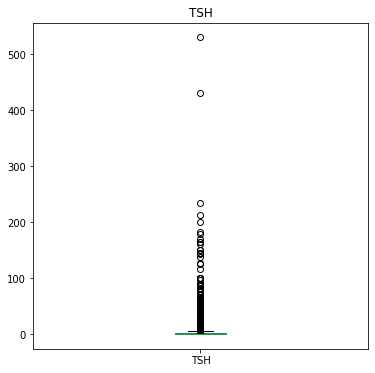

****************************************************


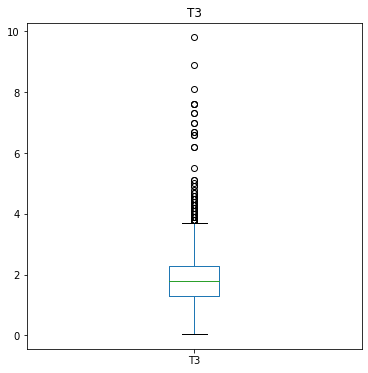

****************************************************


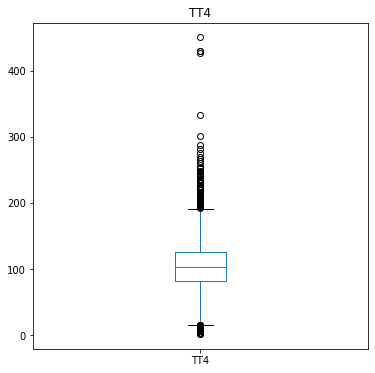

****************************************************


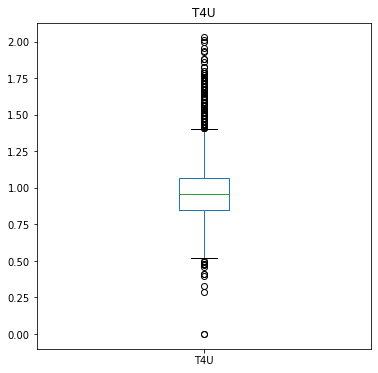

****************************************************


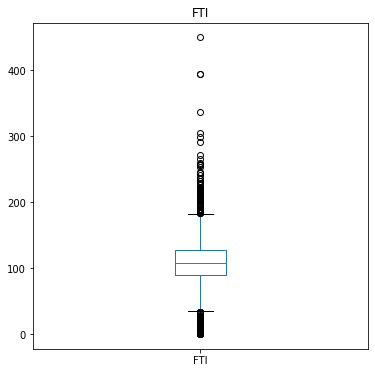

****************************************************


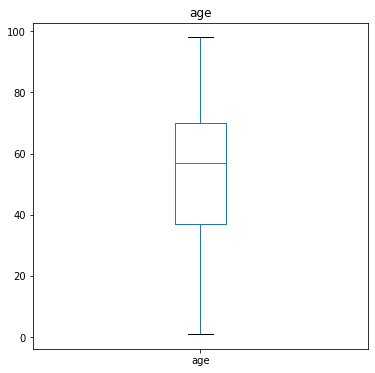

****************************************************


In [219]:
# Checking for outliers and anomalies in continuous data

#plotting boxplots

for col in cols2:
  df.boxplot(col, grid=False)
  plt.title(col)
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')


There were outliers in the TSH,T3, TT4, T4U and FTI columns. They will not be dropped because too high or low values are possible as an indication of a type disease. Also to note is that many of the substances are on different scales.

The age column has no outliers or anomalies.

In [220]:
#Checking for duplicates
#wont drop duplicates because its possible for patients to have similar characteristics
df.duplicated().sum()

54

In [221]:
df.to_csv('tidied_diagnosis')

## Univariate Analysis

In [222]:

cat = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'] #categorical variables
cont = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age'] #continuous variables

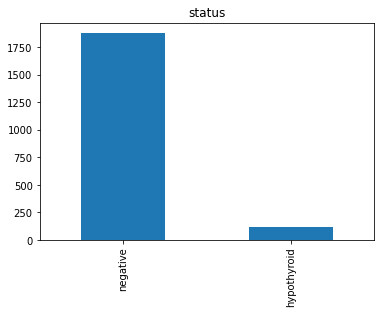

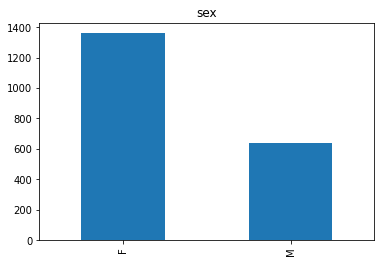

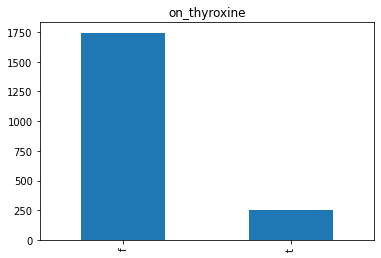

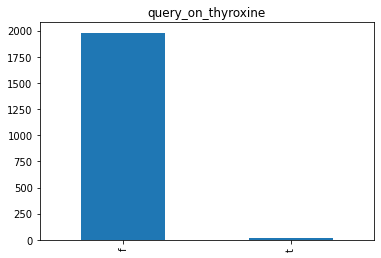

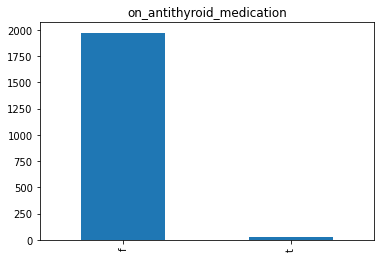

In [223]:
# Countplots for columns representing categorical information
for col in cat[0:5]:

    df[col].value_counts().plot.bar(title=col)
    plt.show()
    print('')


* Most patients did not have hypothroid
* Most patients were female
* Most patients were not on thyroxine.
* Most patients had no query on thyroxine.
* Most were not on antithyroid medication.


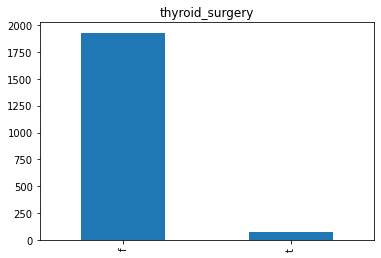

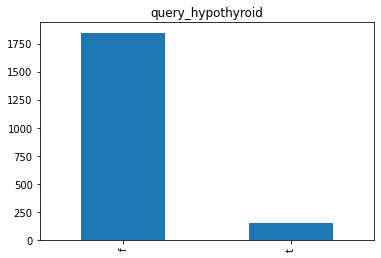

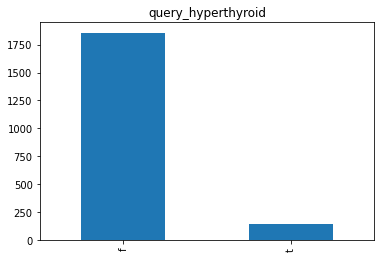

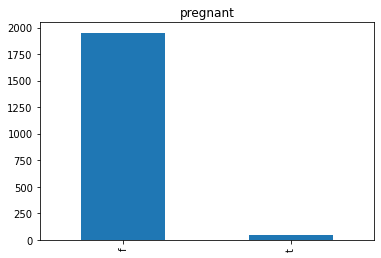

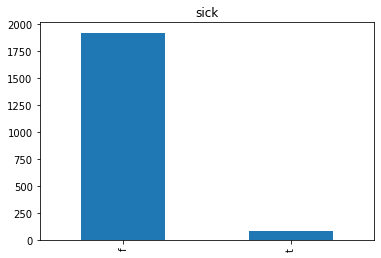

In [224]:
# Countplots for columns representing categorical information
for col in cat[5:10]:

    df[col].value_counts().plot.bar(title=col)
    plt.show()
    print('')

* Most patients had not had thyroid surgery.
* Most patients had no query on hypothyroid.
* Most patients  had no query on hyperthyroid.
* Most patients were not pregnant.
* Most were not sick.

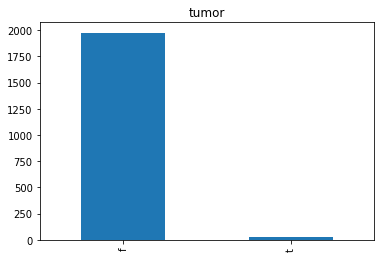

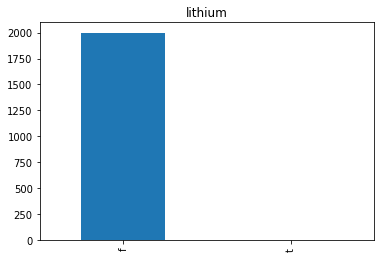

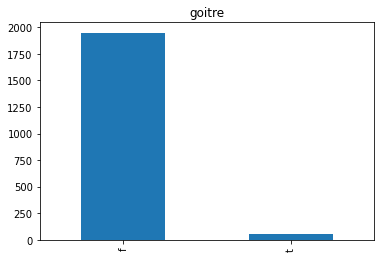

In [225]:
# Countplots for columns representing categorical information
for col in cat[10:]:

    df[col].value_counts().plot.bar(title=col)
    plt.show()
    print('')

* Most patients had no tumor
* Most patients had no in the lithium column
* Most patients did not have goitre


In [226]:
#Although not reflected on graph very few patients had yes in the lithium column
df.lithium.value_counts()

f    1998
t       2
Name: lithium, dtype: int64

In [227]:
# descriptive statistics continuous data

for col in cont:
  print(f'\n{col}:')
  print('')
  print(df[col].describe())
  print('**************************************')


TSH:

count    2000.000000
mean        6.092235
std        24.542970
min         0.000000
25%         0.000000
50%         0.700000
75%         2.300000
max       530.000000
Name: TSH, dtype: float64
**************************************

T3:

count    2000.000000
mean        1.924900
std         0.970525
min         0.050000
25%         1.300000
50%         1.800000
75%         2.300000
max         9.800000
Name: T3, dtype: float64
**************************************

TT4:

count    2000.000000
mean      107.364650
std        45.047061
min         2.000000
25%        82.000000
50%       103.000000
75%       126.000000
max       450.000000
Name: TT4, dtype: float64
**************************************

T4U:

count    2000.000000
mean        0.988040
std         0.231548
min         0.000000
25%         0.850000
50%         0.960000
75%         1.070000
max         2.030000
Name: T4U, dtype: float64
**************************************

FTI:

count    2000.000000
mean      110.

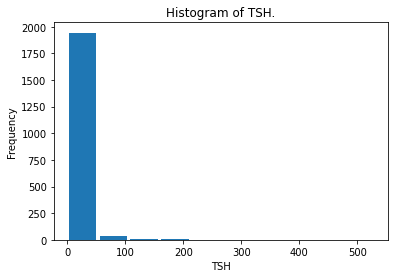

Most TSH values fell within the range of 0.0 to 53.0 in their respective scale



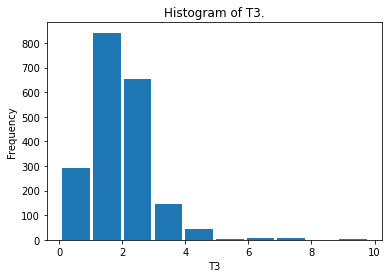

Most T3 values fell within the range of 1.02 to 2.0 in their respective scale



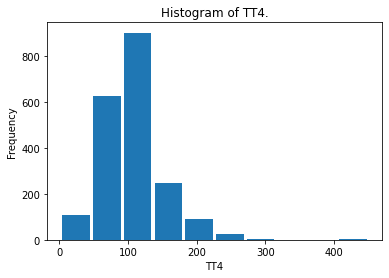

Most TT4 values fell within the range of 91.6 to 136.4 in their respective scale



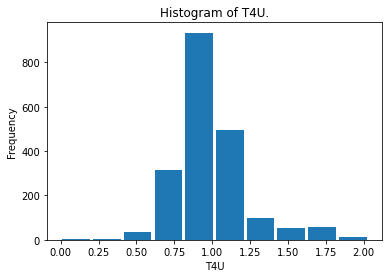

Most T4U values fell within the range of 0.81 to 1.01 in their respective scale



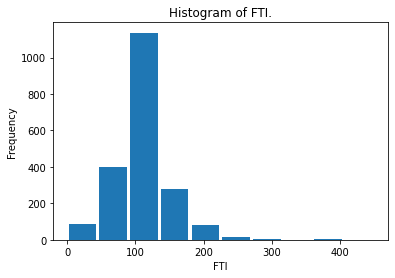

Most FTI values fell within the range of 90.0 to 135.0 in their respective scale



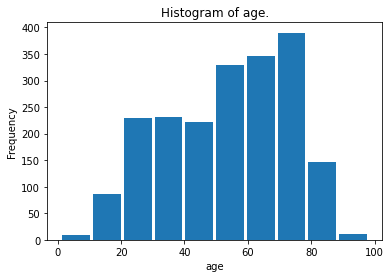

Most age values fell within the range of 68 to 78



In [228]:
#plotting histograms for continuous data

for col in cont:
  (n, bins, patches) = plt.hist(df[col], bins= 10, rwidth=0.9)

  plt.title(f'Histogram of {col}.')
  plt.xlabel(f'{col}')
  plt.ylabel('Frequency')
  plt.show()
  #creating a dataframe with the values of bin edges
  df_hist = pd.DataFrame(data=n, columns=['bin_values'])
  df_hist['left_bin_edge'] = bins[0:-1]
  df_hist
  last = {
    'bin_values': 0,
    'left_bin_edge': bins[-1]
  }
  df_hist = df_hist.append(last, ignore_index=True)
  #looping through dataframe above to identify bins with most frequency and the respective bin edges 
  for i in df_hist.index:
    if df_hist.loc[i, 'bin_values'] == df_hist['bin_values'].max():
      left_edge =  df_hist.loc[i, 'left_bin_edge']
      right_lim = df_hist.loc[i+1, 'left_bin_edge']
      if col == 'age':
        print(f'Most {col} values fell within the range of { int(left_edge)} to {int(right_lim)}')
      else:
        print(f'Most {col} values fell within the range of { round(left_edge, 2)} to {round(right_lim, 2)} in their respective scale')

  print('')

## Bivariate Analysis

In [229]:
#target column of interest is status
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

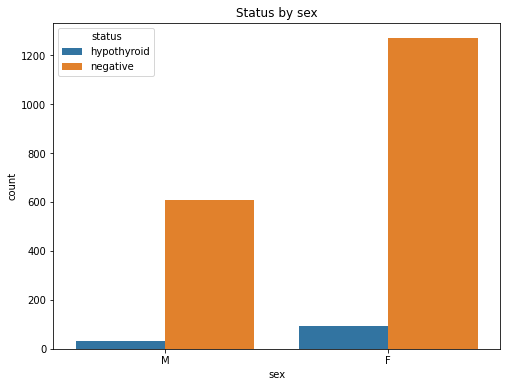

sex  status     
F    negative       0.932403
     hypothyroid    0.067597
M    negative       0.953052
     hypothyroid    0.046948
Name: status, dtype: float64



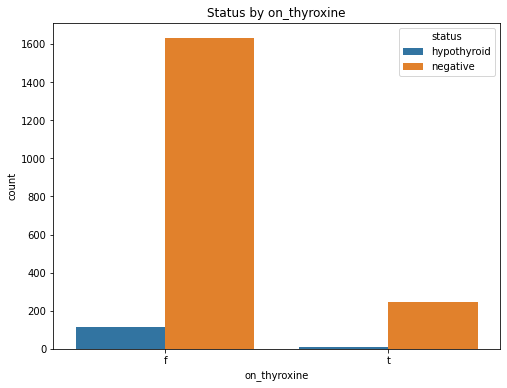

on_thyroxine  status     
f             negative       0.934633
              hypothyroid    0.065367
t             negative       0.968750
              hypothyroid    0.031250
Name: status, dtype: float64



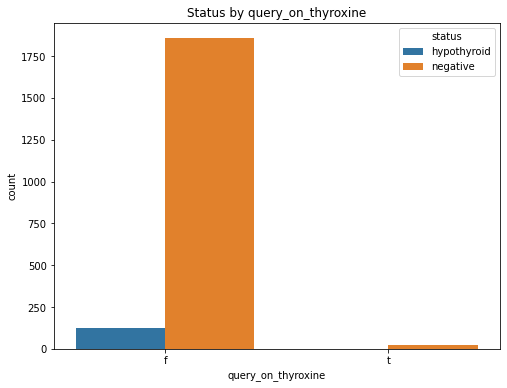

query_on_thyroxine  status     
f                   negative       0.938353
                    hypothyroid    0.061647
t                   negative       1.000000
Name: status, dtype: float64



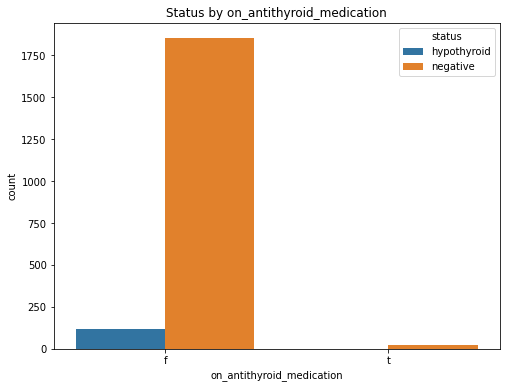

on_antithyroid_medication  status     
f                          negative       0.938672
                           hypothyroid    0.061328
t                          negative       0.962963
                           hypothyroid    0.037037
Name: status, dtype: float64



In [230]:
#plotting how status varies according to the different categorical variables

for col in cat[1:5]:
  ax = sb.countplot(x=col, hue = 'status', data=df)
  plt.title(f'Status by {col}')
  plt.gcf().set_size_inches(8, 6)
  
  plt.show()
  print(df.groupby([col])['status'].value_counts(normalize=True))
  print('')

Higher proportion of the women had hypothroid when compared to the proportion of men.

Higher proportion of those not on thyroxine had hypothyroid when compared to the proportion of those on thyroxine with hypothyroid.

No patients with query on thyroxine had hypothyroid

Higher proportion of those not on antithyroid medication had hypothyroid when compared to the proportion of those on the medication with hypothyroid.




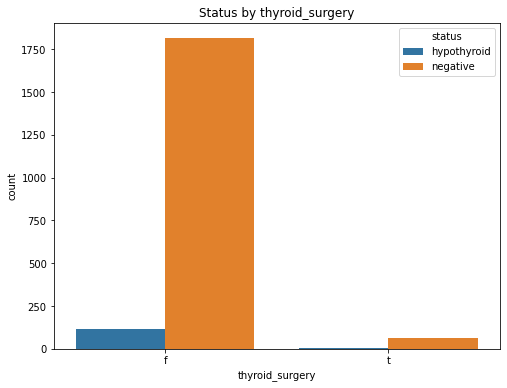

thyroid_surgery  status     
f                negative       0.940871
                 hypothyroid    0.059129
t                negative       0.888889
                 hypothyroid    0.111111
Name: status, dtype: float64



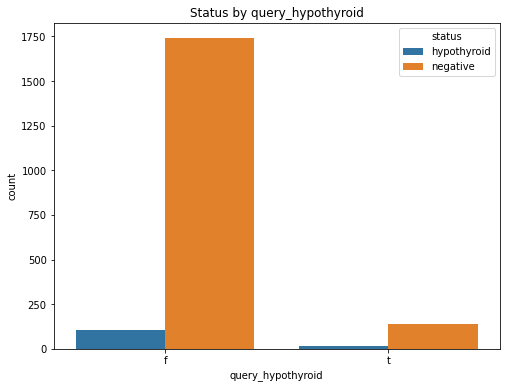

query_hypothyroid  status     
f                  negative       0.942068
                   hypothyroid    0.057932
t                  negative       0.901961
                   hypothyroid    0.098039
Name: status, dtype: float64



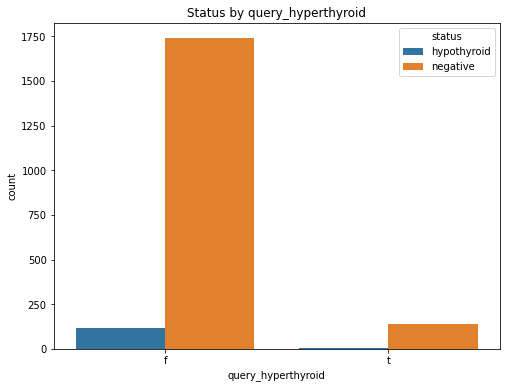

query_hyperthyroid  status     
f                   negative       0.936961
                    hypothyroid    0.063039
t                   negative       0.965278
                    hypothyroid    0.034722
Name: status, dtype: float64



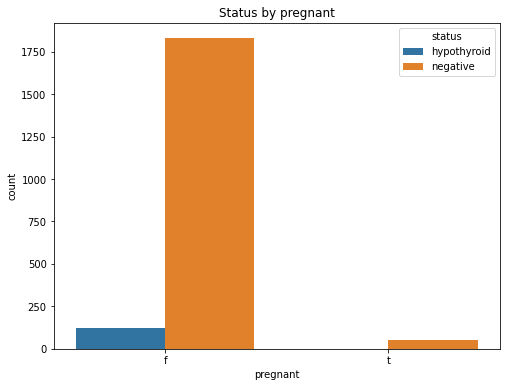

pregnant  status     
f         negative       0.937949
          hypothyroid    0.062051
t         negative       0.980000
          hypothyroid    0.020000
Name: status, dtype: float64



In [231]:
for col in cat[5:9]:
  ax = sb.countplot(x=col, hue = 'status', data=df)
  plt.title(f'Status by {col}')
  plt.gcf().set_size_inches(8, 6)
  
  plt.show()
  print(df.groupby([col])['status'].value_counts(normalize=True))
  print('')

Higher proportion of those without thyroid surgery had hypothyroid when compared to the proportion of those with thyroid surgery with hypothyroid.

Higher proportion of those with a query on hypothyroid had hypothyroid when compared to the proportion of those without a query with hypothyroid.

Higher proportion of those without a query on hyperthyroid had hypothyroid when compared to the proportion of those with a query with hypothyroid.

Higher proportion of those not pregnant had hypothyroid when compared to the proportion of those pregnant with hypothyroid.

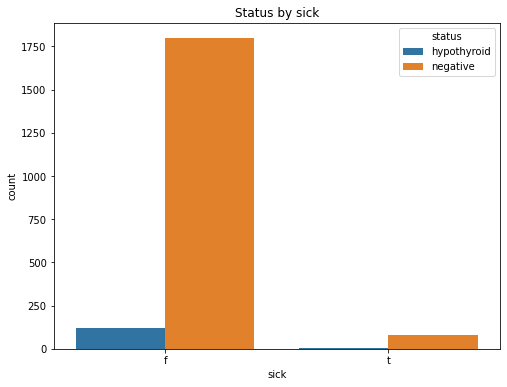

sick  status     
f     negative       0.937435
      hypothyroid    0.062565
t     negative       0.975610
      hypothyroid    0.024390
Name: status, dtype: float64



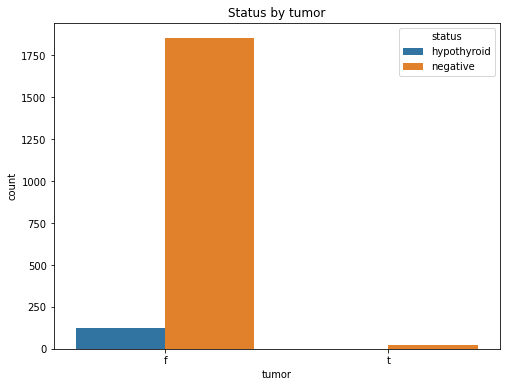

tumor  status     
f      negative       0.938228
       hypothyroid    0.061772
t      negative       1.000000
Name: status, dtype: float64



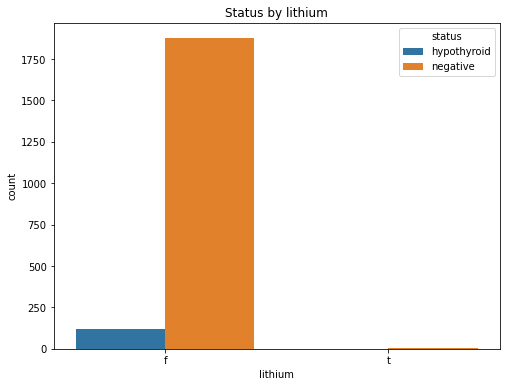

lithium  status     
f        negative       0.938939
         hypothyroid    0.061061
t        negative       1.000000
Name: status, dtype: float64



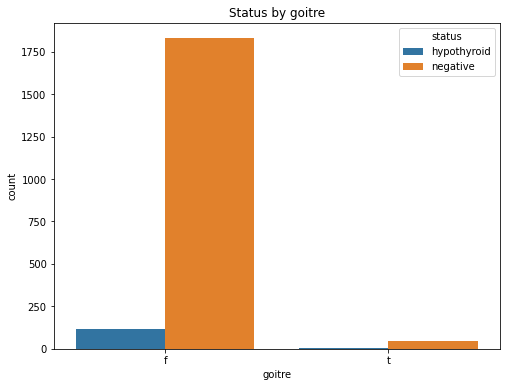

goitre  status     
f       negative       0.939908
        hypothyroid    0.060092
t       negative       0.905660
        hypothyroid    0.094340
Name: status, dtype: float64



In [232]:
for col in cat[9:]:
  ax = sb.countplot(x=col, hue = 'status', data=df)
  plt.title(f'Status by {col}')
  plt.gcf().set_size_inches(8, 6)
  
  plt.show()
  print(df.groupby([col])['status'].value_counts(normalize=True))
  print('')

Higher proportion of those not sick had hypothyroid when compared to the proportion of those sick and with hypothyroid.

Higher proportion of those without a tumor had hypothyroid when compared to the proportion of those with a tumor with hypothyroid(none).

Only those with lithium as false had hypothyroid when compared to those with lithium as true.

Higher proportion of those with goitre had hypothyroid when compared to the proportion of those without  goitre with hypothyroid.

## Multivariate Analysis and Modelling

In [176]:
#categorical columns
cat

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre']

In [234]:
#encoding the categorical feature columns
enc=LabelEncoder()
for col in cat[1:]:
  df[col] = enc.fit_transform(df[col])
df['status'] = df['status'].replace({'hypothyroid': 1, 'negative':0})

In [178]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,1,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,1,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


### Decision-Tree-Based Approach

We'll be using the version of the dataset that was cleaned before exploratory analysis. Summary of the cleaning:
* All columns were in string format, including those representing continuous data
anomalies were checked for and it was identified that there were ‘?’ characters in some columns which represented null values. TBG had majority null records so the column was dropped. After that respective records with nulls in the other columns were dropped.
* After dropping the nulls, Columns of the substances (eg  TSH etc) had the corresponding columns of whether they were measured or not (eg TSH_ measured etc) have only one value - yes, so those measured or not columns were dropped (this was expected because if substance_measured was yes, there was a measurement input in the substance column, but if it was no, the  substance column had a (‘?’)/null because there was no corresponding measurement. Dropping nulls therefore ended up also dropping records with the value no in measured or not columns).
* After, the continuous columns were converted to numerical datatypes using label encoding. status column was manually converted to give hyperthyroid value 1 and negative - 0.
* Outliers were found in numerical columns but were kept because outliers could be indicative of severe disease cases.
* After exploratory univariate and bivariate analysis, the categorical columns were label encoded to allow for further analysis and modelling.

In [179]:
#columns after earlier cleaning detailed above
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

#### Random Forest Classifier

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
[[558   4]
 [  6  32]]
Accuracy: 0.9833333333333333
Recall: 0.8421052631578947
F1-score: 0.8648648648648649


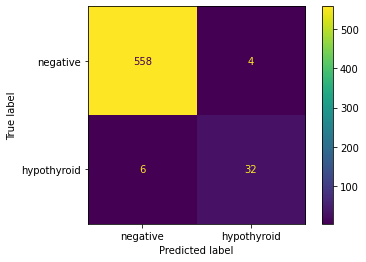

In [184]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables

y = df['status'].values


X = df.drop(columns='status').values

x_cols = df.drop(columns='status').columns


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



# Import the model
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

print(comparison_frame.head())

from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, y_pred)))

Above: accuracy = 0.98, recall 0.84, f1-score 0.86

In disease diagnosis, minimizing the number of false negatives is of more importance so recall score is more important. f1-score is also important as it gives a combined idea of false positives and false negatives. A recall score of 0.84 and f1-score of 0.86 are not bad but model could do better.

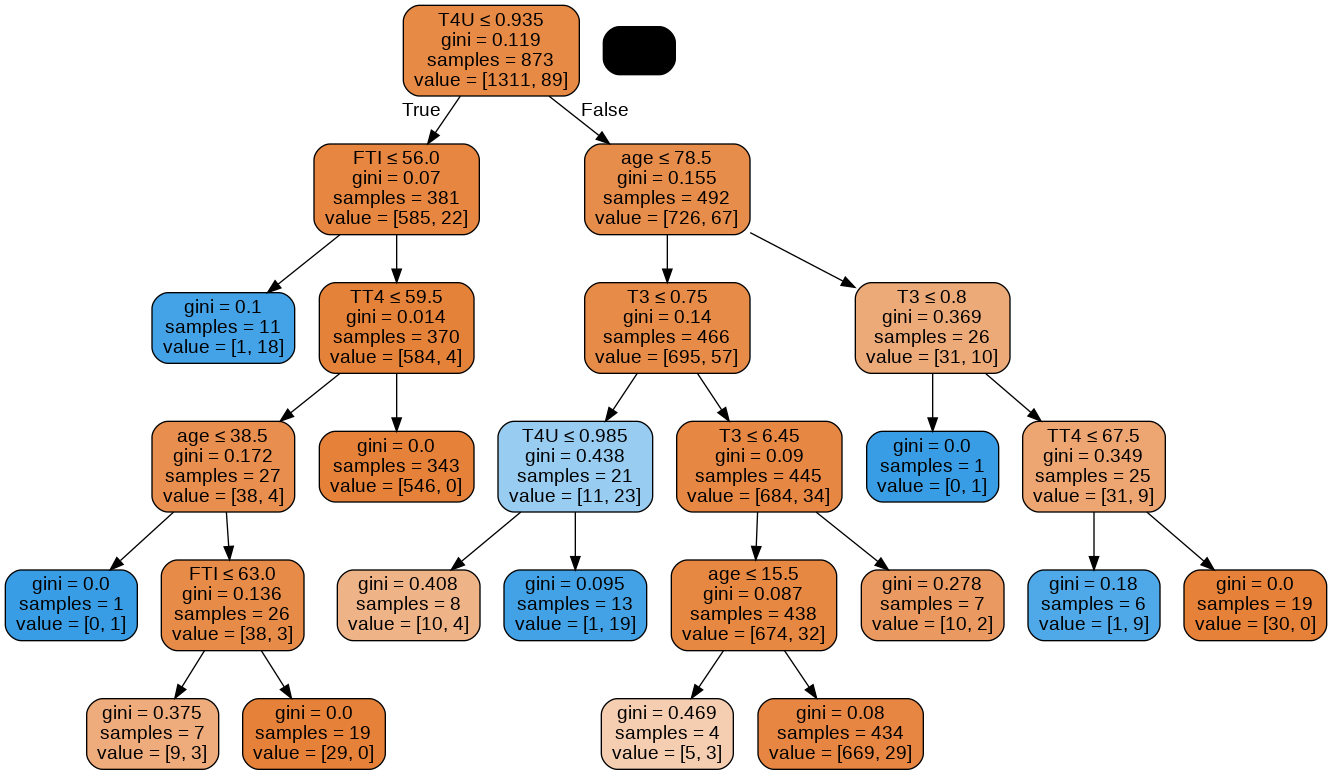

In [50]:
#visualising the first tree of model above
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('forest.png')
Image(graph.create_png())

In [51]:

#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestClassifier(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
[[558   4]
 [  4  34]]
Accuracy: 0.9866666666666667
Recall: 0.8947368421052632
F1-score: 0.8947368421052632


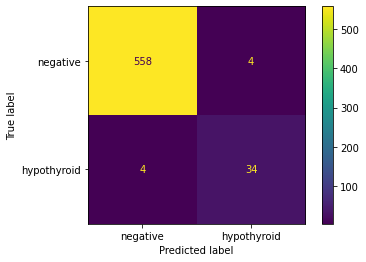

In [52]:
forest = RandomForestClassifier(n_estimators = 100, random_state=0, min_samples_split = 5, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

print(comparison_frame.head())

from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, y_pred)))

After tuning hyperparamteres using grid search- Accuracy: 0.987, Recall: 0.0.895, F1-score: 0.895.
All metrics were better after tuning. (before tuning-  accuracy = 0.983, recall 0.84, f1-score 0.86)

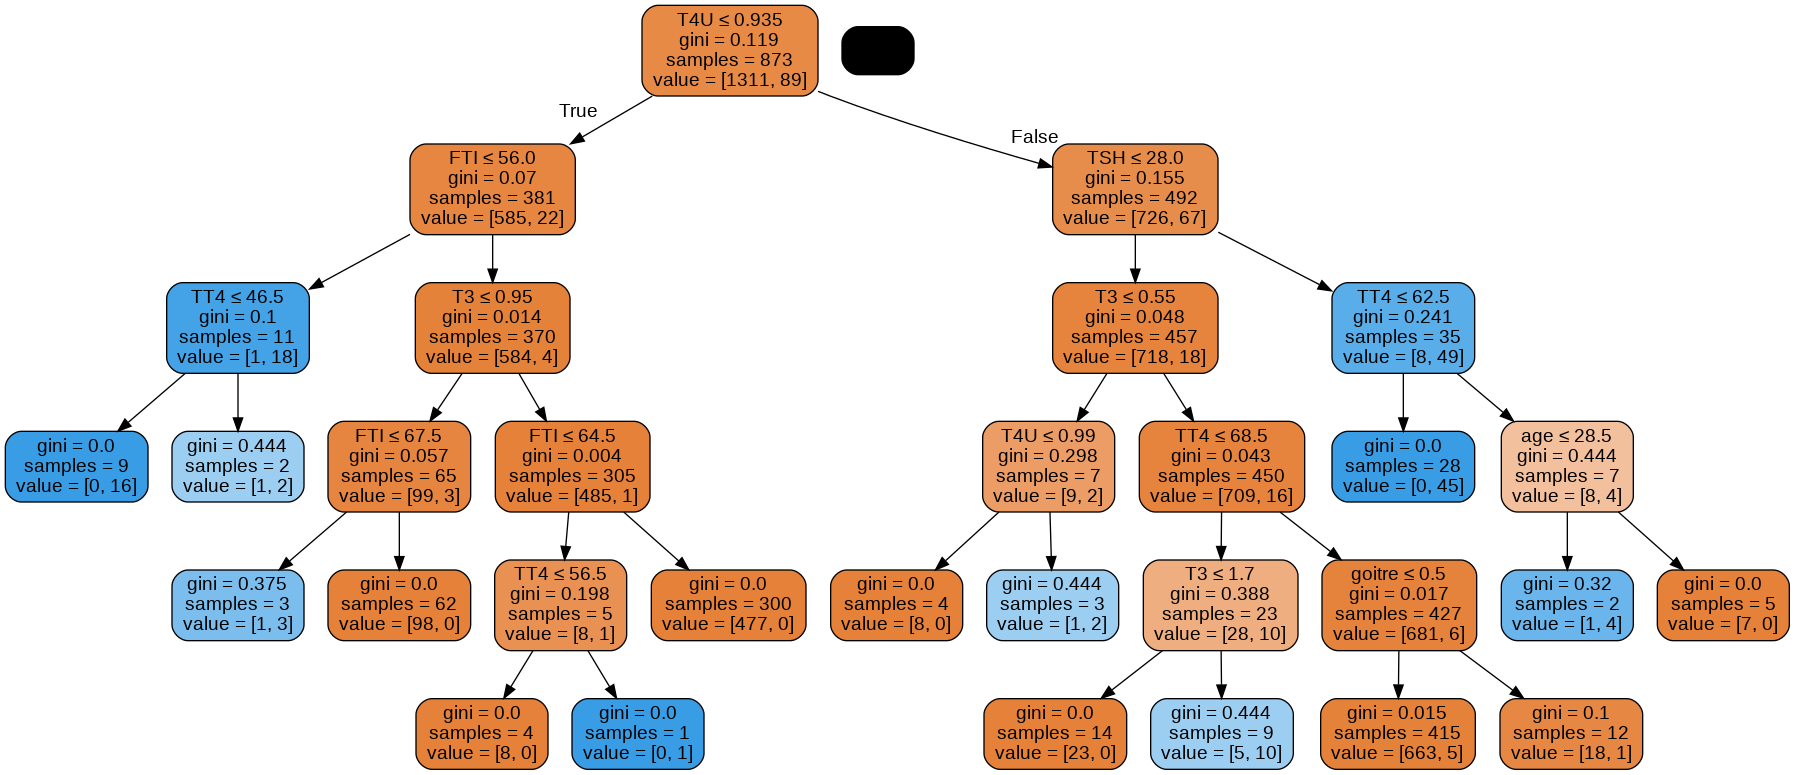

In [54]:
#visualising the first tree of the fine-tuned hyperparameter model
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('forest.png')
Image(graph.create_png())

#### Gradient Boosting Classifier

      Actual  Predicted
586        0          0
1884       0          0
1778       0          0
1121       0          0
2779       0          0
[[366   3]
 [  3  28]]
Accuracy: 0.985
Recall: 0.9032258064516129
F1-score: 0.9032258064516129


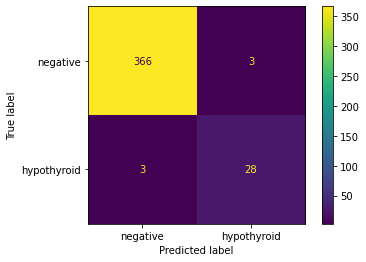

In [74]:
#gradientboostingclassifier


#first model with hyperparameter values shown
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7, max_depth=5, random_state=0)
gbc = gbc.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gbc.predict(X_test)



comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

print(comparison_frame.head())

from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, y_pred)))

In [56]:
#disease diagnosis
#minimizing the number of false negatives is of more importance so recall score is more important
#f1-score gives a combined idea of false positives and false negatives

In [57]:
#even before tuning the parameters, the recall and f-1 scores, which are important metrics to consider when it comes to disease diagnosis,
# are  better than the best identified random forest.
#However, the accuracy is slightly lower. We will run a grid search to fine-tune the hyperparameters
#tuned random forest: Accuracy: 0.987, Recall: 0.895, F1-score: 0.895
#first gradient boosting classifier model - Accuracy: 0.985, Recall: 0.903, F1-score: 0.903

In [75]:
#for first gradient boosting model:n_estimators=100, learning_rate=0.7, max_depth=5
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': np.arange(0.2, 0.6, 0.05),
              'max_depth': np.arange(2,7)}
gdbc = GradientBoostingClassifier(random_state=0)
#finding values
search = GridSearchCV(estimator=gdbc,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 100}


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
[[558   4]
 [  3  35]]
Accuracy: 0.9883333333333333
Recall: 0.9210526315789473
F1-score: 0.9090909090909091


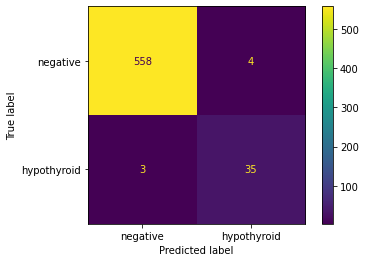

In [185]:
#using parameters identified above
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=5, random_state=0)
gbc = gbc.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gbc.predict(X_test)



comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

print(comparison_frame.head())

from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, y_pred)))

In [60]:
#using the tuned hyperparameters, the scores are better than the first gradient boosting classifier
#first gradient boosting classifier model - Accuracy: 0.985, Recall: 0.903, F1-score: 0.903
#after running a grid search to fine tune hyperparameters - Accuracy: 0.988, Recall: 0.921,F1-score: 0.909
#these are also higher than the best random forest model identified, therefore we will go 
#with the gradient boosting classifier with these parameters:n_estimators=100, learning_rate=0.25, max_depth=5,

#### Feature importances with best model

The best model amongst the random forest and gradient boosting classifier models above was identified to be the gradient boosting classifier with these parameters: n_estimators=100, learning_rate=0.25, max_depth=5

In [ ]:
#

Variable: FTI, Importance: 0.59
Variable: TSH, Importance: 0.31
Variable: age, Importance: 0.03
Variable: on_antithyroid_medication, Importance: 0.03
Variable: on_thyroxine, Importance: 0.02
Variable: thyroid_surgery, Importance: 0.01
Variable: query_hypothyroid, Importance: 0.01
Variable: sex, Importance: 0.0
Variable: query_on_thyroxine, Importance: 0.0
Variable: query_hyperthyroid, Importance: 0.0
Variable: pregnant, Importance: 0.0
Variable: sick, Importance: 0.0
Variable: tumor, Importance: 0.0
Variable: lithium, Importance: 0.0
Variable: goitre, Importance: 0.0
Variable: T3, Importance: 0.0
Variable: TT4, Importance: 0.0
Variable: T4U, Importance: 0.0


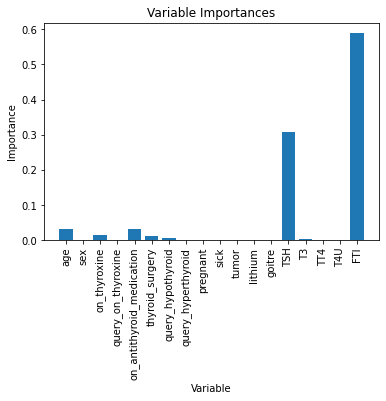

In [186]:
# List of tuples with variable and importance using the gbc tuned model (the best)
importances = gbc.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_cols, importances)]

#sorting the values in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Printing out the feature and importances 
for feat, signif in feature_importances:
  print(f'Variable: {feat}, Importance: {signif}') 

# Making a bar chart
plt.bar(x_cols, importances) 
# Tick labels for x axis
plt.xticks(rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Most impactful features are FTI and TSH

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
[[558   4]
 [  2  36]]
Accuracy: 0.99
Recall: 0.9473684210526315
F1-score: 0.9230769230769231


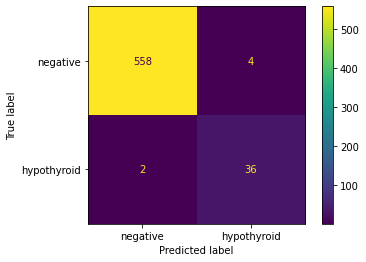

In [189]:
#using best parameters and top 5 features to build a model

# Split the independent and dependent variables

y = df['status'].values


X = df[['FTI', 'TSH', 'age', 'on_antithyroid_medication', 'on_thyroxine']].values

x_cols = df.drop(columns='status').columns


# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=5, random_state=0)
gbc = gbc.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = gbc.predict(X_test)



comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

print(comparison_frame.head())

from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, y_pred)))


In [ ]:
#using the best gradient boosting classifier with all the features gave
#Accuracy: 0.988, Recall: 0.921,F1-score: 0.909.
#from the above, after building a model using the same hyperparamters
#but using only the top 5 most important features, all the scores improved
#Accuracy: 0.99, Recall: 0.947, F1-score: 0.923

The final best model amongst the random forest and gradient boosting classifier models above was identified to be the gradient boosting classifier with these parameters: n_estimators=100, learning_rate=0.25, max_depth=5, using these top 5 features: 'FTI', 'TSH', 'age', 'on_antithyroid_medication', 'on_thyroxine'.

### SVM Approach

We'll be using the version of the dataset that was cleaned before exploratory analysis. Summary of the cleaning:
* All columns were in string format, including those representing continuous data
anomalies were checked for and it was identified that there were ‘?’ characters in some columns which represented null values. TBG had majority null records so the column was dropped. After that respective records with nulls in the other columns were dropped.
* After dropping the nulls, Columns of the substances (eg  TSH etc) had the corresponding columns of whether they were measured or not (eg TSH_ measured etc) have only one value - yes, so those measured or not columns were dropped (this was expected because if substance_measured was yes, there was a measurement input in the substance column, but if it was no, the  substance column had a (‘?’)/null because there was no corresponding measurement. Dropping nulls therefore ended up also dropping records with the value no in measured or not columns).
* After, the continuous columns were converted to numerical datatypes using label encoding. status column was manually converted to give hyperthyroid value 1 and negative - 0.
* Outliers were found in numerical columns but were kept because outliers could be indicative of severe disease cases.
* After exploratory univariate and bivariate analysis, the categorical columns were label encoded to allow for further analysis and modelling.

In addition to above, the features will be scaled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


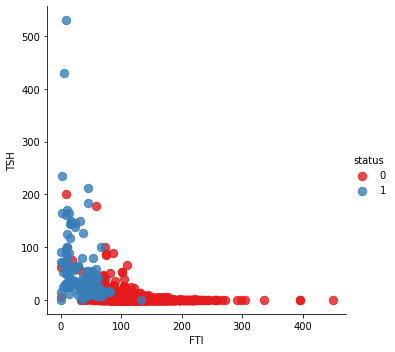

In [84]:
# using TSH and FTI features (top 2 features identified by best gradient boosting classifier)
sb.lmplot('FTI','TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [98]:
accuracies = []

#### Linear kernel

[[367   2]
 [  6  25]]
Accuracy : 0.98
Recall:  0.8064516129032258
F1-score:  0.8620689655172414


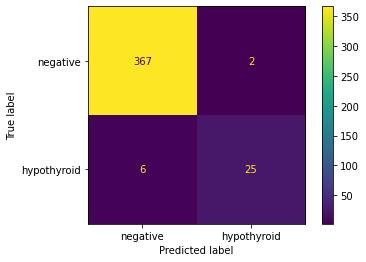

In [99]:
#linear kernel
# splitting target and features
X = df[['FTI', 'TSH']]
y = df['status']

#scaling features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the model. starting with a low C parameter value for the first model
svc = SVC(kernel= 'linear', C=0.05)
model = svc.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

#model evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'Linear 1: Accuracy: {a}, recall: {r}, f1: {f1} '])

In [100]:
accuracies

[['Linear 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 ']]

In [102]:
#tuning parameters

parameters = {'C': np.arange(0.05, 30, 10),
            }
svct = SVC(kernel= 'linear')
#finding values
search = GridSearchCV(estimator=svct,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 10.05}


[[367   2]
 [  4  27]]
Accuracy : 0.985
Recall:  0.8709677419354839
F1-score:  0.9


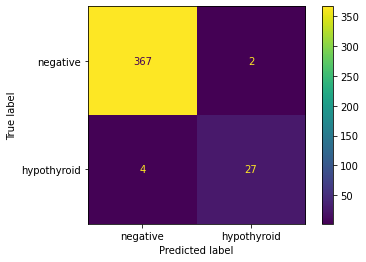

In [103]:
# Fit the model
svc = SVC(kernel= 'linear', C = 10.05)
model = svc.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

#model evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'Linear 2: Accuracy: {a}, recall: {r}, f1: {f1} '])

In [104]:
accuracies
#using C value of 10.05 identified using the grid search resulted in better scores

[['Linear 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['Linear 2: Accuracy: 0.985, recall: 0.8709677419354839, f1: 0.9 ']]

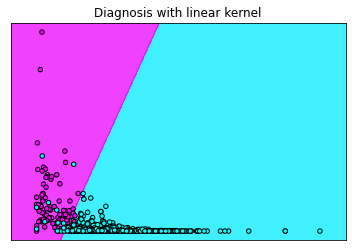

In [105]:
#Visualising the model
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from the model with the better linear kernel C value
def plot_contours(ax, clf, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Diagnosis with linear kernel')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### Polynomial kernel

[[367   2]
 [  6  25]]
Accuracy : 0.98
Recall:  0.8064516129032258
F1-score:  0.8620689655172414


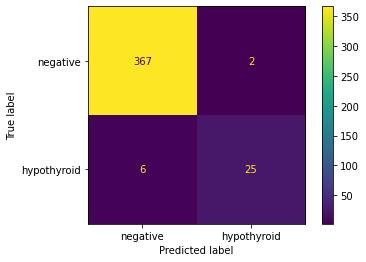

In [106]:
#polynomial kernel

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred = polyclassifier.predict(X_test)
#model evaluation

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'polynomial 1: Accuracy: {a}, recall: {r}, f1: {f1} '])

In [ ]:
#accuracy - 0.98, recall -0.80, f1- 0.86. f1 and recall need improvement

[[367   2]
 [  5  26]]
Accuracy : 0.9825
Recall:  0.8387096774193549
F1-score:  0.8813559322033899


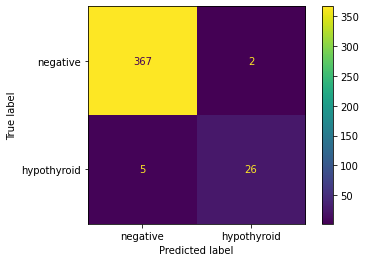

In [119]:
#Testing with a different degree hyperparameter value

# Building the model 
polyclassifier = SVC(kernel='poly',degree=2,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred = polyclassifier.predict(X_test)
#model evaluation

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'polynomial 2: Accuracy: {a}, recall: {r}, f1: {f1} '])

In [109]:
accuracies
#Polynomial kernel model 2, with a degree of 2 gave better scores than polyomial 1 (degree 3)
#the scores are still lower than the best identified with the linear kernel (linear 2)

[['Linear 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['Linear 2: Accuracy: 0.985, recall: 0.8709677419354839, f1: 0.9 '],
 ['polynomial 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['polynomial 2: Accuracy: 0.9825, recall: 0.8387096774193549, f1: 0.8813559322033899 ']]

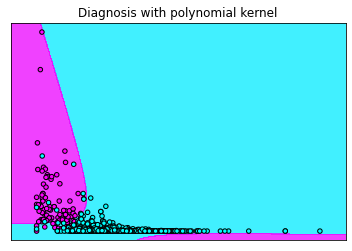

In [120]:
# Creating a mesh grid for the graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes, with model with the better polynomial kernel-degree 2
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Diagnosis with polynomial kernel')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#### RBF kernel

[[367   2]
 [  7  24]]
Accuracy : 0.9775
Recall:  0.7741935483870968
F1-score:  0.8421052631578947


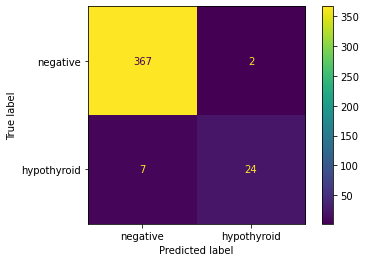

In [113]:
#rbf
#rbf kernel

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)
#model evaluation
#model evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'rbf 1: Accuracy: {a}, recall: {r}, f1: {f1} '])

In [61]:
#tuning parameters

parameters = {
              'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]
            }
svcr = SVC(kernel= 'rbf')
#finding values
search = GridSearchCV(estimator=svcr,param_grid=parameters,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

{'C': 10, 'gamma': 1}


[[366   3]
 [  2  29]]
Accuracy : 0.9875
Recall:  0.9354838709677419
F1-score:  0.9206349206349206


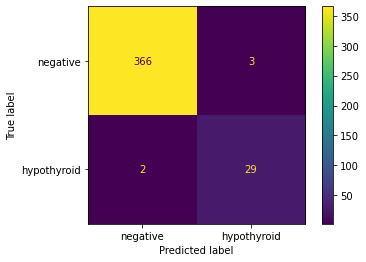

In [114]:


# Building the model 
rbfclassifier = SVC(kernel='rbf', gamma = 1, C=10)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)
#model evaluation
#model evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'Rbf 2: Accuracy: {a}, recall: {r}, f1: {f1} '])

In [115]:
accuracies
#after tuning gamma parameter, a rbf-kernel-based model with better scores (rbf2) than the first
#one was identified. this model also performed better than the linear and polynomial models. it
#is therefore the best model.

[['Linear 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['Linear 2: Accuracy: 0.985, recall: 0.8709677419354839, f1: 0.9 '],
 ['polynomial 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['polynomial 2: Accuracy: 0.9825, recall: 0.8387096774193549, f1: 0.8813559322033899 '],
 ['rbf 1: Accuracy: 0.9775, recall: 0.7741935483870968, f1: 0.8421052631578947 '],
 ['Rbf 2: Accuracy: 0.9875, recall: 0.9354838709677419, f1: 0.9206349206349206 ']]

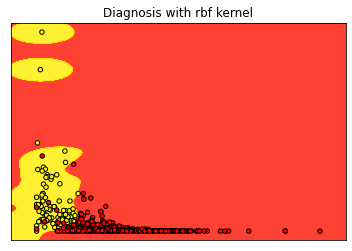

In [117]:
# Creating a mesh grid for the graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from the best rbf based model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Diagnosis with rbf kernel')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [130]:
accuracies

[['Linear 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['Linear 2: Accuracy: 0.985, recall: 0.8709677419354839, f1: 0.9 '],
 ['polynomial 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['polynomial 2: Accuracy: 0.9825, recall: 0.8387096774193549, f1: 0.8813559322033899 '],
 ['rbf 1: Accuracy: 0.9775, recall: 0.7741935483870968, f1: 0.8421052631578947 '],
 ['Rbf 2: Accuracy: 0.9875, recall: 0.9354838709677419, f1: 0.9206349206349206 ']]

#### using best identified kernel and more features

[[367   2]
 [  9  22]]
Accuracy : 0.9725
Recall:  0.7096774193548387
F1-score:  0.7999999999999999


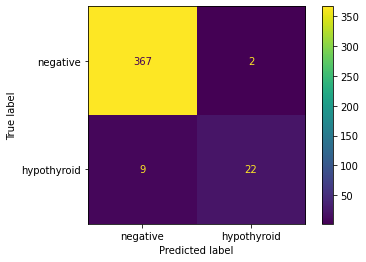

In [237]:
#using best identified model - rbf-kernel-based model 2 - with more features for prediction

#using the features with importances > 0.00 (in the gradient boosting section) were:
# Variable: FTI, Importance: 0.59
# Variable: TSH, Importance: 0.31
# Variable: age, Importance: 0.03
# Variable: on_antithyroid_medication, Importance: 0.03
# Variable: on_thyroxine, Importance: 0.02
# Variable: thyroid_surgery, Importance: 0.01
# Variable: query_hypothyroid, Importance: 0.01

X = df[['FTI', 'TSH', 'age', 'on_antithyroid_medication', 'on_thyroxine', 'thyroid_surgery', 'query_hypothyroid']]
y = df['status']

#scaling features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fitting the model with tuned parameters
rbfclassifier = SVC(kernel='rbf', gamma = 1, C=10)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred = rbfclassifier.predict(X_test)
#model evaluation
#model evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative', 'hypothyroid']));
a = metrics.accuracy_score(y_test, y_pred)
r = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy :", a)
print('Recall: ', r)
print('F1-score: ', f1)
accuracies.append([f'rbf3(using tuned params of rbf2 but with more features): Accuracy: {a}, recall: {r}, f1: {f1} '])

the scores Accuracy : 0.972, Recall:  0.710, F1-score:  0.800 when more features are included are lower than the scores when using only FTI and TSH Accuracy: 0.9875, recall: 0.935, f1: 0.921. 

It is therefore better to only use the 2 features with the rbf kernel, gamma = 1, C=10.

In [238]:
accuracies

[['Linear 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['Linear 2: Accuracy: 0.985, recall: 0.8709677419354839, f1: 0.9 '],
 ['polynomial 1: Accuracy: 0.98, recall: 0.8064516129032258, f1: 0.8620689655172414 '],
 ['polynomial 2: Accuracy: 0.9825, recall: 0.8387096774193549, f1: 0.8813559322033899 '],
 ['rbf 1: Accuracy: 0.9775, recall: 0.7741935483870968, f1: 0.8421052631578947 '],
 ['Rbf 2: Accuracy: 0.9875, recall: 0.9354838709677419, f1: 0.9206349206349206 '],
 ['rbf3(using tuned params of rbf2 but with more features): Accuracy: 0.9725, recall: 0.7096774193548387, f1: 0.7999999999999999 ']]

Best model using svm approach: svc model with:
kernel - rbf
C-10
gamma-1
and two features: 'FTI' and 'TSH'

## Conclusions and Recommendations

### Conclusion

The dataset was loaded, and cleaned, and univariate and bivariate analysis carried out providing valuable insights on the target and feature variables. Multivariate analysis and modelling were then carried out. The major objective was achieved - building a model that determines whether or not the patient's symptoms indicate they have hypothyroid



> **Some univariate analysis results:**
* Most patients did not have hypothroid
* Most patients were female
* Most patients were not on thyroxine.
* Most patients had no query on thyroxine.
* Most were not on antithyroid medication etc

> **Some bivariate analysis results**:

* Higher proportion of the women had hypothroid when compared to the proportion of men.

* Higher proportion of those not on thyroxine had hypothyroid when compared to the proportion of those on thyroxine with hypothyroid.

* No patients with query on thyroxine had hypothyroid

* Higher proportion of those not on antithyroid medication had hypothyroid when compared to the proportion of those on the medication with hypothyroid.

* Higher proportion of those without a tumor had hypothyroid when compared to the proportion of those with a tumor with hypothyroid(none).

* Higher proportion of those with goitre had hypothyroid when compared to the proportion of those without goitre with hypothyroid. etc


>**Modelling**

**1. Decision-Tree-Based Approach.**


* Random forest model 1 - Accuracy - 0.983, Recall - 0.84, F1 - 0.86

* Random forest model 2(after tuning hyper parameters)- Accuracy - 0.987, Recall - 0.895,F1 - 0.895

* Gradient boosting classifier model 1 -Accuracy - 0.985, Recall - 0.903, F1- 0.903

* Gradient boosting classifier 2 (after tuning - Accuracy - 0.988, Recall - 0.921, F1 - 0.909

* Gradient boosting classifier 3 (using parameters of gb classifier 2 but only with the top 5 important features instead of all features) -Accuracy - 0.990, Recall - 0.947, F1 - 0.923

Referring to the scores above, the final best model amongst the random forest and gradient boosting classifier models was identified to be gradient boosting classifier 3 (parameters: n_estimators=100, learning_rate=0.25, max_depth=5, using these top 5 features: 'FTI', 'TSH', 'age', 'on_antithyroid_medication', 'on_thyroxine').
 

**2.Support Vector Machine Approach.**

* Linear kernel 1: Accuracy: 0.98, recall: 0.806, f1: 0.862 
* Linear kernel 2: Accuracy: 0.985, recall: 0.871, f1: 0.9 ']
* polynomial kernel 1: Accuracy: 0.98, recall: 0.806, f1: 0.862
* polynomial kernel 2: Accuracy: 0.982, recall: 0.838, f1: 0.881
* rbf kernel 1: Accuracy: 0.978, recall: 0.774, f1: 0.842
* Rbf kernel 2: Accuracy: 0.988, recall: 0.935, f1: 0.921
* Rrbf 3 (using same tuned params of rbf2 but with more features): Accuracy: 0.972, recall: 0.71, f1: 0.8

From the above, the radial basis function kernel with gamma = 1, C=10 performed best (Rbf kernel 2: Accuracy: 0.988, recall: 0.935, f1: 0.921) when compared with the linear and polynomial kernel function models when using the 2 features TSH and FTI. However, when this best model was used with more features, it performed lower especially in recall and f1-scores which are important when it comes to disease diagnosis. Therefore, it is better when the model is used with the 2 features.



**Comparing svm and decision-tree-based models**

The best model identified using the svm approach (Rbf kernel 2: Accuracy: 0.988, recall: 0.935, f1: 0.921, features: FTI, TSH) has lower scores than the best model identified using decision-tree-based approaches, specifically the Gradient boosting classifier 3 (parameters: n_estimators=100, learning_rate=0.25, max_depth=5, but only with the top 5 important features instead of all features) -Accuracy - 0.990, Recall - 0.947, F1 - 0.923.

### Recommendation

Based on the analysis, for determining whether or not a patient's symptoms indicate that the patient has hypothyroid, we would recommend using gradient boosting, specifically the model with these specifications:
* parameters: n_estimators=100, learning_rate=0.25, max_depth=5
* trained using these features: 'FTI', 'TSH', 'age', 'on_antithyroid_medication', 'on_thyroxine'.

Out of all the models tested, it was the one with the best predictive power (highest accuracy, recall and f1-scores).